<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/Bspline_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Splines

---
We use the spring broad data to demonstrate the use of cubic spline to fit the curve. Ref. https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/


In [ ]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

# read data_set
data = pd.read_csv('https://raw.githubusercontent.com/changsksu/K-State-IMSE641/master/springboard_profiles.csv', sep=',', na_values=".")

data.head()

,Depth,Profile1,Profile2
0,1,57.157121,57.989755
1,2,56.868678,56.445888
2,3,61.907278,56.396648
3,4,57.727986,57.125067
4,5,59.042560,61.435297


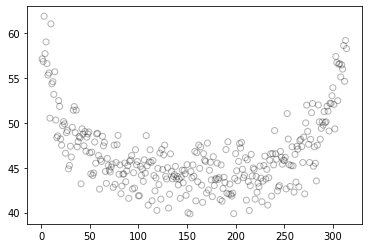

In [ ]:
data_x = data['Depth']
data_y = data['Profile1']
data_y2 = data['Profile2']
plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

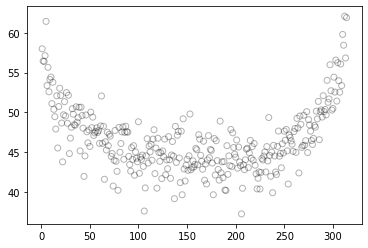

In [ ]:
plt.scatter(data_x, data_y2, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

[ 4.47059091e-04 -1.41191398e-01  5.40258419e+01]


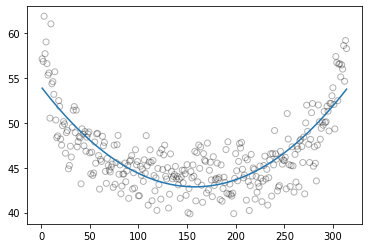

In [ ]:
# Generating weights for polynomial function with degree =2
weights = np.polyfit(data_x, data_y, 2)
print(weights)

# Generating model with the given weights
model = np.poly1d(weights)

# We will plot the graph for 70 observations only
xp = np.linspace(data_x.min(),data_x.max(),70)
pred_plot = model(xp)
plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

In [ ]:
# cubic and natual spline
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generating cubic spline with 3 knots at 50, 150 and 250
transformed_x = dmatrix("bs(train, knots=(100,150,200), degree=3, include_intercept=False)", {"train": data_x},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(data_y, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,50,75, 100, 125, 150, 175, 200, 225, 250,275, 300),degree =3, include_intercept=False)", {"train": data_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(data_y, transformed_x2).fit()


In [ ]:
# Predictions on both splines
from sklearn.metrics import mean_squared_error
from math import sqrt
pred1 = fit1.predict(dmatrix("bs(valid, knots=(100,150,200), include_intercept=False)", {"valid": data_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,50,75, 100, 125, 150, 175, 200, 225, 250,275, 300),degree =3, include_intercept=False)", {"valid": data_x}, return_type='dataframe'))

# Calculating RMSE values
rms1 = sqrt(mean_squared_error(data_y2, pred1))
print(rms1)

rms2 = sqrt(mean_squared_error(data_y2, pred2))
print(rms2)


# We will plot the graph for 70 observations only
xp = np.linspace(data_x.min(),data_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(100,150,200), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,50,75, 100, 125, 150, 175, 200, 225, 250, 275, 300),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

2.314280289864385
2.26769907124001


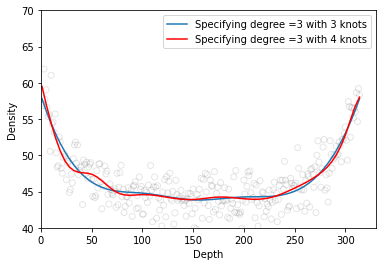

In [ ]:
# Plot the splines and error bands
plt.scatter(data.Depth, data.Profile1, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(0,330)
plt.ylim(40,70)
plt.xlabel('Depth')
plt.ylabel('Density')
plt.show()

# How does the Bspline method improve the fitting? Does the use of more knots improve the fitting?